In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing

# Load Data

In [2]:
raw_housing_price = pd.read_csv('housing.csv.zip')
raw_housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
raw_housing_price.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
raw_housing_price.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# Clean Data

In [5]:
raw_housing_price.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [6]:
raw_housing_price.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Drop total_bedrooms, because the correlation is only 0.049686.
cleaned_housing_price = raw_housing_price.drop('total_bedrooms', axis = 1)
cleaned_housing_price.head()

longitude  latitude  housing_median_age  total_rooms  population  \
0    -122.23     37.88                41.0        880.0       322.0   
1    -122.22     37.86                21.0       7099.0      2401.0   
2    -122.24     37.85                52.0       1467.0       496.0   
3    -122.25     37.85                52.0       1274.0       558.0   
4    -122.25     37.85                52.0       1627.0       565.0   

   households  median_income  median_house_value ocean_proximity  
0       126.0         8.3252            452600.0        NEAR BAY  
1      1138.0         8.3014            358500.0        NEAR BAY  
2       177.0         7.2574            352100.0        NEAR BAY  
3       219.0         5.6431            341300.0        NEAR BAY  
4       259.0         3.8462            342200.0        NEAR BAY

In [8]:
# Replace ocean_proximity by Numbers
raw_housing_price["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
cleaned_housing_price = cleaned_housing_price.replace({'ISLAND':0, 'NEAR BAY':1, 'NEAR OCEAN':2, '<1H OCEAN':3, 'INLAND':4})
cleaned_housing_price.head()

longitude  latitude  housing_median_age  total_rooms  population  \
0    -122.23     37.88                41.0        880.0       322.0   
1    -122.22     37.86                21.0       7099.0      2401.0   
2    -122.24     37.85                52.0       1467.0       496.0   
3    -122.25     37.85                52.0       1274.0       558.0   
4    -122.25     37.85                52.0       1627.0       565.0   

   households  median_income  median_house_value  ocean_proximity  
0       126.0         8.3252            452600.0                1  
1      1138.0         8.3014            358500.0                1  
2       177.0         7.2574            352100.0                1  
3       219.0         5.6431            341300.0                1  
4       259.0         3.8462            342200.0                1

In [10]:
cleaned_housing_price['ocean_proximity'].value_counts()

3    9136
4    6551
2    2658
1    2290
0       5
Name: ocean_proximity, dtype: int64

In [11]:
# Convert the measure of median_income from tens of thousands of US Dollars to US Dollar
cleaned_housing_price['median_income'] = cleaned_housing_price['median_income']*10000
cleaned_housing_price.head()

longitude  latitude  housing_median_age  total_rooms  population  \
0    -122.23     37.88                41.0        880.0       322.0   
1    -122.22     37.86                21.0       7099.0      2401.0   
2    -122.24     37.85                52.0       1467.0       496.0   
3    -122.25     37.85                52.0       1274.0       558.0   
4    -122.25     37.85                52.0       1627.0       565.0   

   households  median_income  median_house_value  ocean_proximity  
0       126.0        83252.0            452600.0                1  
1      1138.0        83014.0            358500.0                1  
2       177.0        72574.0            352100.0                1  
3       219.0        56431.0            341300.0                1  
4       259.0        38462.0            342200.0                1

# Inspect Data

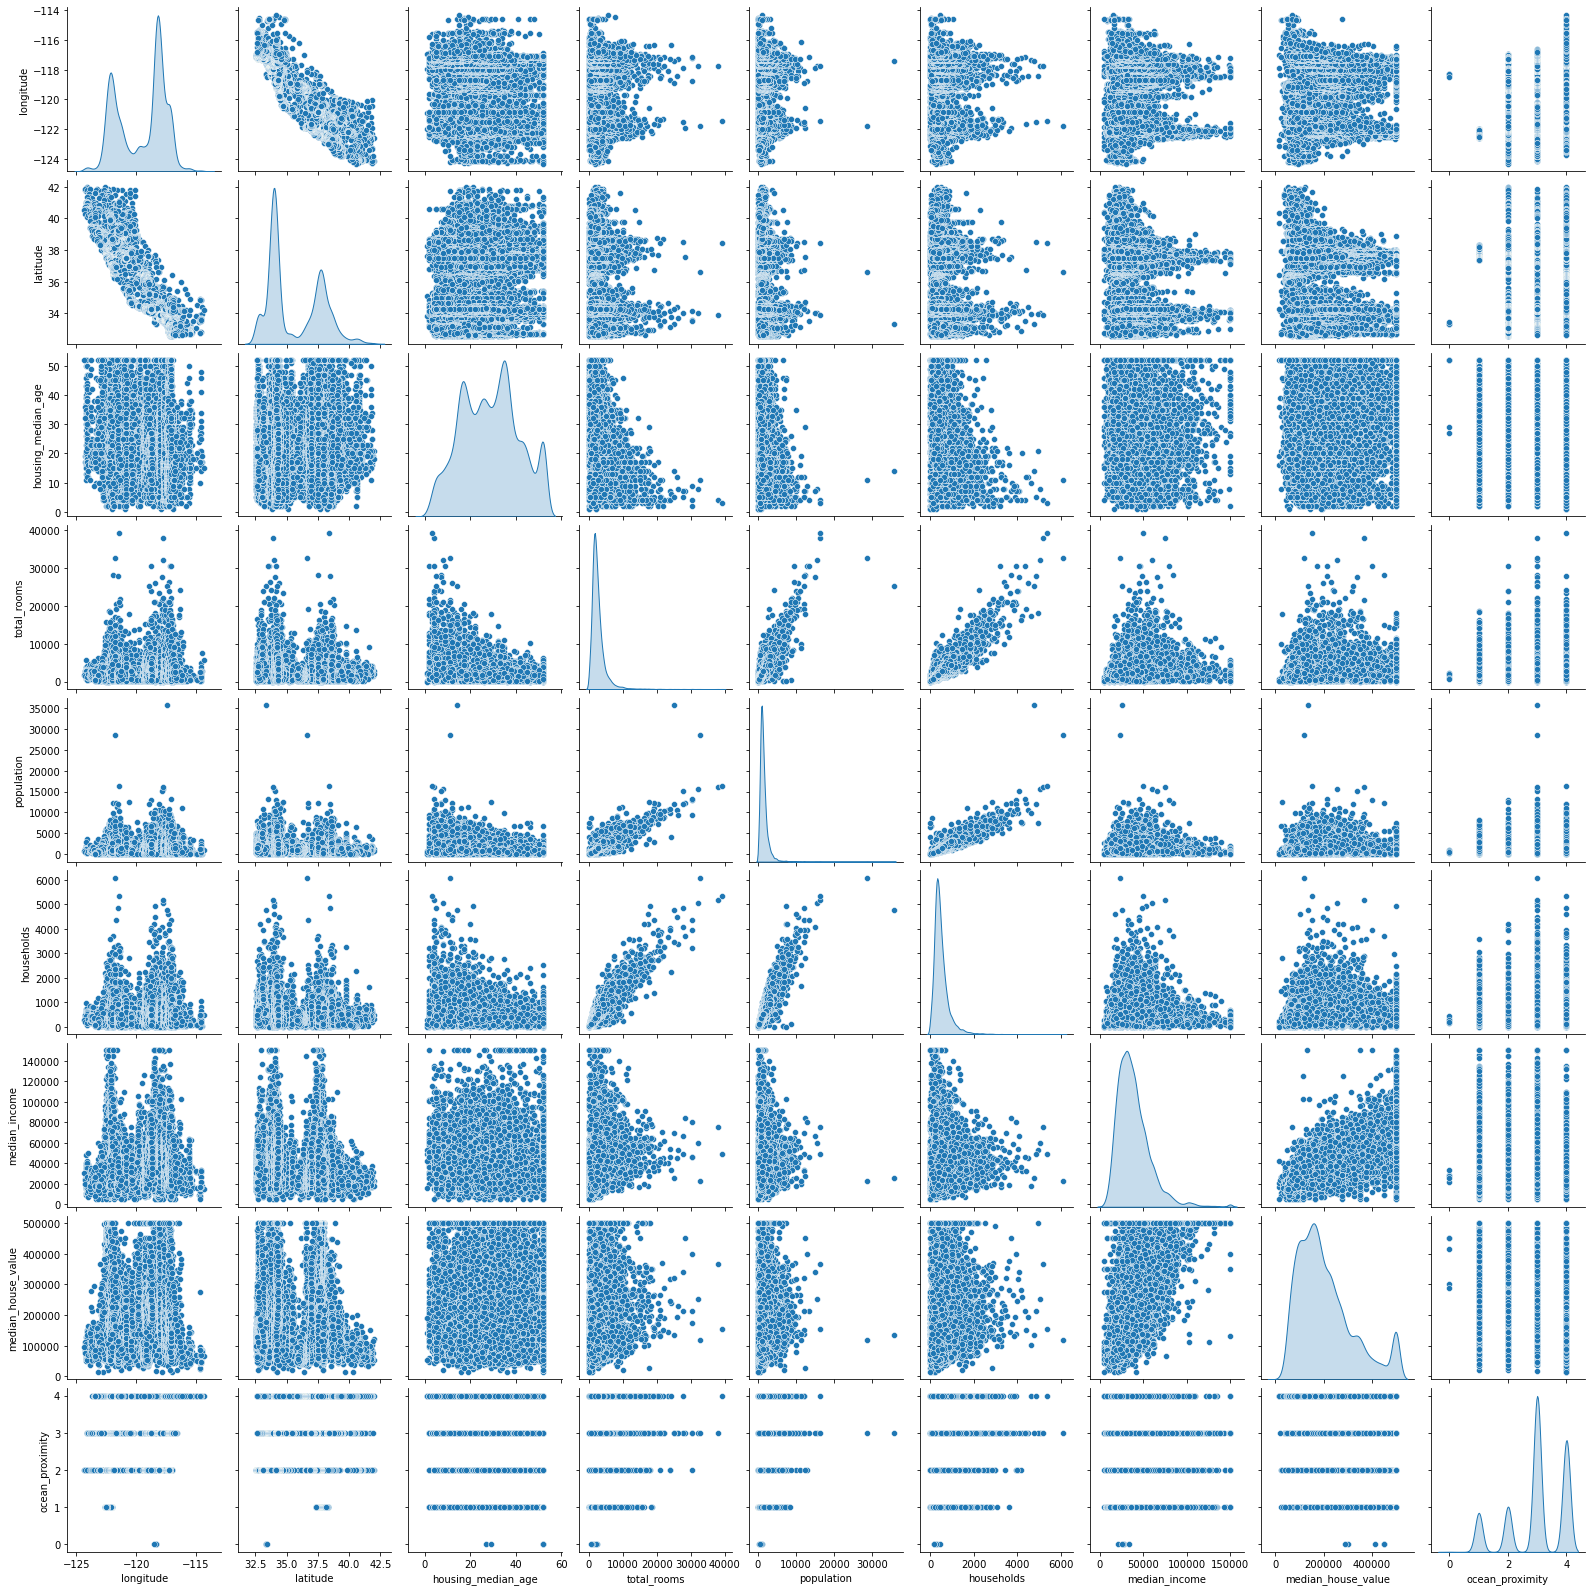

In [12]:
sns.pairplot(cleaned_housing_price[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']], diag_kind='kde')

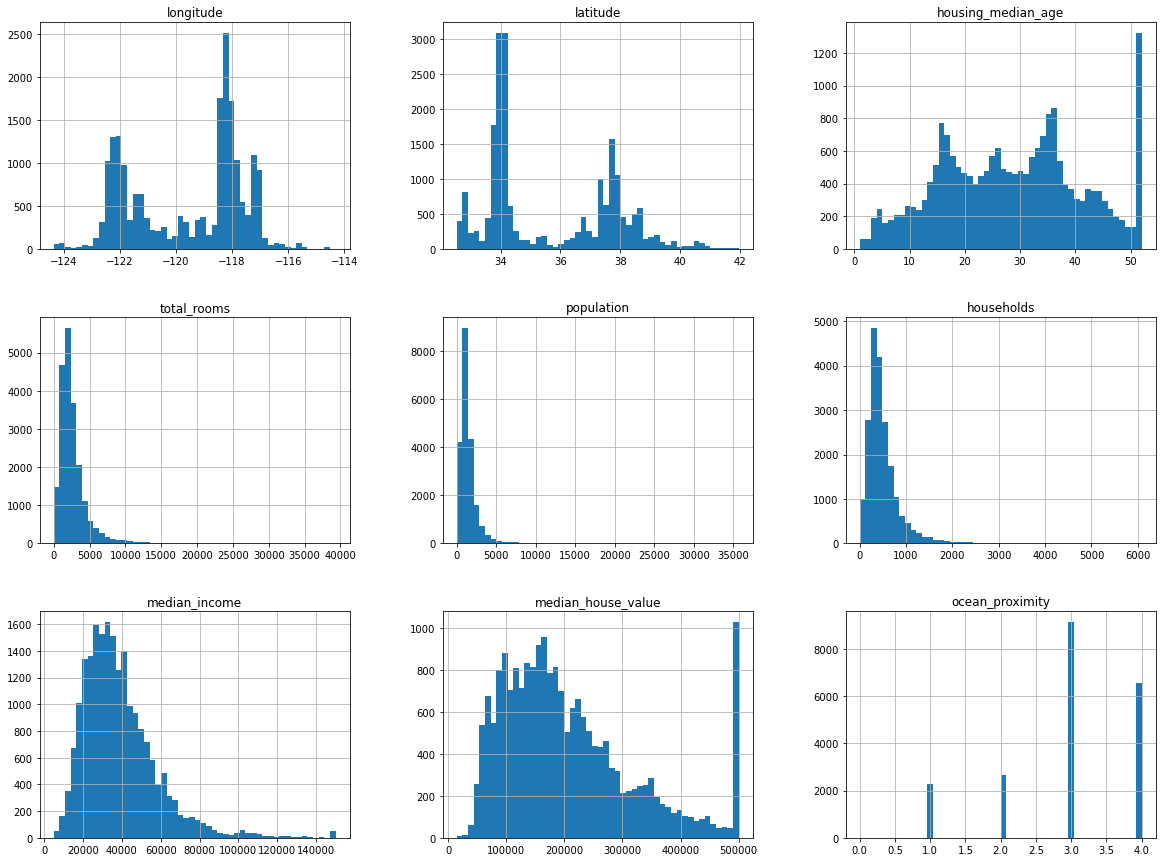

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_housing_price.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
cleaned_housing_price.describe().transpose()

count           mean            std       min  \
longitude           20640.0    -119.569704       2.003532   -124.35   
latitude            20640.0      35.631861       2.135952     32.54   
housing_median_age  20640.0      28.639486      12.585558      1.00   
total_rooms         20640.0    2635.763081    2181.615252      2.00   
population          20640.0    1425.476744    1132.462122      3.00   
households          20640.0     499.539680     382.329753      1.00   
median_income       20640.0   38706.710029   18998.217179   4999.00   
median_house_value  20640.0  206855.816909  115395.615874  14999.00   
ocean_proximity     20640.0       2.965988       0.943948      0.00   

                          25%        50%        75%        max  
longitude             -121.80    -118.49    -118.01    -114.31  
latitude                33.93      34.26      37.71      41.95  
housing_median_age      18.00      29.00      37.00      52.00  
total_rooms           1447.75    2127.00    3148.00   39320.00  
population             787.00    1166.00    1725.00   35682.00  
households             280.00     409.00     605.00    6082.00  
median_income        25634.00   35348.00   47432.50  150001.00  
median_house_value  119600.00  179700.00  264725.00  500001.00  
ocean_proximity          3.00       3.00       4.00       4.00

# Build Model

In [15]:
cleaned_housing_price.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
ocean_proximity      0.271730 -0.007695           -0.295012     0.031586   

                    population  households  median_income  median_house_value  \
longitude             0.099773    0.055310      -0.015176           -0.045967   
latitude             -0.108785   -0.071035      -0.079809           -0.144160   
housing_median_age   -0.296244   -0.302916      -0.119034            0.105623   
total_rooms           0.857126    0.918484       0.198050            0.134153   
population            1.000000    0.907222       0.004834           -0.024650   
households            0.907222    1.000000       0.013033            0.065843   
median_income         0.004834    0.013033       1.000000            0.688075   
median_house_value   -0.024650    0.065843       0.688075            1.000000   
ocean_proximity       0.039415   -0.012873      -0.163755           -0.397251   

                    ocean_proximity  
longitude                  0.271730  
latitude                  -0.007695  
housing_median_age        -0.295012  
total_rooms                0.031586  
population                 0.039415  
households                -0.012873  
median_income             -0.163755  
median_house_value        -0.397251  
ocean_proximity            1.000000

In [16]:
# Drop target
cleaned_housing_price_data_only = cleaned_housing_price.drop(['median_house_value'], axis=1)
# Drop target, longitude(-0.0459), population(-0.0246), households(0.065843)
X = cleaned_housing_price.drop(['median_house_value', 'longitude', 'population', 'households'], axis=1)
# Target
y = cleaned_housing_price.median_house_value

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fitting Linear Regression using statsmodel

In [17]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
# Only use relevant columns: latitude, housing_median_age, total_rooms, median_income, ocean_proximity
train_data_copy = X_train.copy()
train_data_copy['median_house_value'] = y_train
m = ols('median_house_value ~ latitude + housing_median_age + total_rooms + median_income + ocean_proximity', train_data_copy).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     4586.
Date:                Fri, 25 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:30:16   Log-Likelihood:            -2.0874e+05
No. Observations:               16512   AIC:                         4.175e+05
Df Residuals:                   16506   BIC:                         4.175e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.883e+05   1.05

## Fitting Linear Regression using sklearn

In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Somewhat close to the statsmodel score(288300)')

Estimated intercept coefficient: 288255.83133575355
Somewhat close to the statsmodel score(288300)


In [21]:
# The coefficientspd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

features  estimatedCoefficients
0            latitude           -5140.009020
1  housing_median_age            1185.985651
2         total_rooms               3.141601
3       median_income               3.922964
4     ocean_proximity          -31138.891335

In [22]:
predicted = lm.predict(X_test)
pd.DataFrame({'predicted': predicted, 'price': y_test})[['predicted', 'price']]

predicted     price
20046   78682.168625   47700.0
3024   127207.647854   45800.0
15663  273051.268311  500001.0
20484  273470.432167  218600.0
9814   231590.757124  278000.0
...              ...       ...
15362  232939.903222  263300.0
16623  197979.616514  266800.0
18086  407711.948307  500001.0
2144   134528.169393   72300.0
3665   184071.462836  151500.0

[4128 rows x 2 columns]

Text(0, 0.5, 'Frequency')

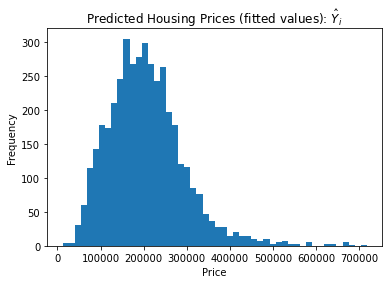

In [23]:
plt.hist(predicted, bins = 50)
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

C:\Users\chuiw1\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

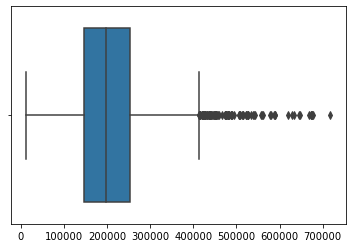

In [24]:
sns.boxplot(predicted)

Text(0.5, 1.0, 'Relationship between predictions and housing price')

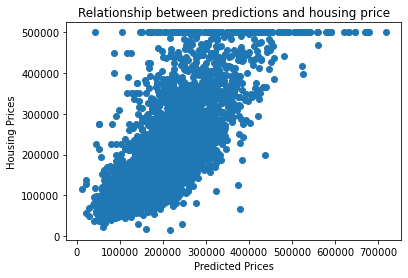

In [25]:
plt.scatter(predicted, y_test)
plt.xlabel("Predicted Prices")
plt.ylabel("Housing Prices")
plt.title("Relationship between predictions and housing price")

### Evaluate Model: the Coefficient of Determination ( 𝑅2 ) and F-Statistic

In [26]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, predicted)
print("The coefficient of determination (R^2) is " + str(r2score) + " which is close to the statsmodel score(0.581)")

The coefficient of determination (R^2) is 0.5680758915169136 which is close to the statsmodel score(0.581)


In [27]:
# Total data rows
N = len(X_train)
# Number of columns
K = 5

In [28]:
fstat = (r2score/(1-r2score))*((N-K-1)/K)
print("The f-statistic is " + str(fstat) + ", which is not very close to the statsmodel score(4586)")

The f-statistic is 4341.809350864403, which is not very close to the statsmodel score(4586)


# Different Models Using Columns [latitude, housing_median_age, total_rooms, median_income, ocean_proximity]

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score   

In [30]:
def display_statistics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    print("rmse: " + str(rmse))
    
    r2score = r2_score(actual, predicted)
    print("The coefficient of determination (R^2): " + str(r2score))
    
    fstat = (r2score/(1-r2score))*((N-K-1)/K)
    print("The f-statistic: " + str(fstat))

In [31]:
def display_scores(model, data, actual):
    scores = cross_val_score(model, data, actual,
                         scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
   
    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("Standard deviation:", rmse_scores.std()) 

## Linear Regression

In [32]:
display_statistics(y_test, predicted)
print()
display_scores(lm, X_test, y_test)

rmse: 75232.78737857137
The coefficient of determination (R^2): 0.5680758915169136
The f-statistic: 4341.809350864403

Scores: [71705.23569563 77916.42696044 77297.42762523 78029.11195844
 77044.57499924 67539.82819268 72974.68479171 82011.36726594
 74410.23386636 73120.50811059]
Mean: 75204.9399466257
Standard deviation: 3877.765387144809


## Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

display_statistics(y_test, tree_model.predict(X_test))
print()
display_scores(tree_model, X_test, y_test)

rmse: 84363.44790341306
The coefficient of determination (R^2): 0.45687251382342886
The f-statistic: 2776.930980332631

Scores: [84368.27965345 87223.93722899 91261.4105164  99879.03308956
 90747.46282277 80703.44034681 77548.04353887 98409.16674938
 84532.59450956 90968.5731318 ]
Mean: 88564.19415875919
Standard deviation: 6793.927800635414


## RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

display_statistics(y_test, forest_model.predict(X_test))
print()
display_scores(forest_model, X_test, y_test)

rmse: 62848.43175205822
The coefficient of determination (R^2): 0.698573083725699
The f-statistic: 7650.708478524462

Scores: [63527.5439523  64697.28688156 68572.84935607 72537.56643755
 70121.63801152 56206.20412017 60590.02482722 70172.33745912
 66713.36437319 67323.8803254 ]
Mean: 66046.2695744113
Standard deviation: 4679.659571994518


## SVR

In [35]:
from sklearn.svm import SVR

svm_model = SVR(kernel="linear")
svm_model.fit(X_train, y_train)

display_statistics(y_test, svm_model.predict(X_test))
print()
display_scores(svm_model, X_test, y_test)

rmse: 81237.3469532933
The coefficient of determination (R^2): 0.4963781041191456
The f-statistic: 3253.7175423083463

Scores: [80163.29386994 85811.54326574 83157.47724126 86419.97263568
 84794.37384003 72529.59386974 80182.8056402  87565.83388811
 82067.71717157 80464.02403442]
Mean: 82315.66354566837
Standard deviation: 4146.353287189571


# Fine-tune the RandomForestRegressor Model

## Using GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 5]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_model1 = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_model1, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 5],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [38]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [39]:
forest_model1_best_estimator = grid_search.best_estimator_
display_statistics(y_test, forest_model1_best_estimator.predict(X_test))
print()
display_scores(forest_model1_best_estimator, X_test, y_test)

rmse: 62639.949122760525
The coefficient of determination (R^2): 0.7005695709312594
The f-statistic: 7723.731601865151

Scores: [60984.45212564 65820.12115338 69735.48617108 71505.26363746
 69598.1865384  57828.02268077 60733.45228523 70128.021386
 67700.33735773 67102.69056577]
Mean: 66113.60339014587
Standard deviation: 4448.967553369915


In [40]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

70983.22785268408 {'max_features': 2, 'n_estimators': 3}
63903.717779842635 {'max_features': 2, 'n_estimators': 10}
61973.13312781692 {'max_features': 2, 'n_estimators': 30}
71157.32504375935 {'max_features': 4, 'n_estimators': 3}
64544.34531263899 {'max_features': 4, 'n_estimators': 10}
62357.616922453984 {'max_features': 4, 'n_estimators': 30}
71388.31484062113 {'max_features': 5, 'n_estimators': 3}
64821.94339568606 {'max_features': 5, 'n_estimators': 10}
62662.80571178656 {'max_features': 5, 'n_estimators': 30}
71039.95119950893 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
64851.659519831366 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
71428.73766469372 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
65267.377935472854 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
73816.53069061383 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
67723.26783253592 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [41]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.079393      0.012986         0.005968    6.177757e-04   
1        0.230584      0.006598         0.011968    4.422006e-07   
2        0.680182      0.020449         0.030918    6.309779e-04   
3        0.114294      0.001861         0.005186    3.989221e-04   
4        0.374990      0.002371         0.011969    6.205107e-04   
5        1.167502      0.064435         0.032905    2.604641e-03   
6        0.138040      0.003382         0.005387    4.852331e-04   
7        0.453788      0.003897         0.012572    4.819657e-04   
8        1.347604      0.017738         0.032102    7.513252e-04   
9        0.107521      0.001597         0.005983    6.299264e-04   
10       0.353449      0.005873         0.013571    7.933547e-04   
11       0.153999      0.009962         0.006382    7.952938e-04   
12       0.487705      0.003950         0.013759    7.479684e-04   
13       0.185898      0.004615         0.005984    1.092712e-03   
14       0.602790      0.008658         0.013759    3.962669e-04   

   param_max_features param_n_estimators param_bootstrap  \
0                   2                  3             NaN   
1                   2                 10             NaN   
2                   2                 30             NaN   
3                   4                  3             NaN   
4                   4                 10             NaN   
5                   4                 30             NaN   
6                   5                  3             NaN   
7                   5                 10             NaN   
8                   5                 30             NaN   
9                   2                  3           False   
10                  2                 10           False   
11                  3                  3           False   
12                  3                 10           False   
13                  4                  3           False   
14                  4                 10           False   

                                               params  split0_test_score  \
0              {'max_features': 2, 'n_estimators': 3}      -5.174596e+09   
1             {'max_features': 2, 'n_estimators': 10}      -4.117248e+09   
2             {'max_features': 2, 'n_estimators': 30}      -3.897922e+09   
3              {'max_features': 4, 'n_estimators': 3}      -5.127295e+09   
4             {'max_features': 4, 'n_estimators': 10}      -4.273223e+09   
5             {'max_features': 4, 'n_estimators': 30}      -3.936025e+09   
6              {'max_features': 5, 'n_estimators': 3}      -5.203344e+09   
7             {'max_features': 5, 'n_estimators': 10}      -4.183477e+09   
8             {'max_features': 5, 'n_estimators': 30}      -3.898781e+09   
9   {'bootstrap': False, 'max_features': 2, 'n_est...      -5.087445e+09   
10  {'bootstrap': False, 'max_features': 2, 'n_est...      -4.191197e+09   
11  {'bootstrap': False, 'max_features': 3, 'n_est...      -5.016745e+09   
12  {'bootstrap': False, 'max_features': 3, 'n_est...      -4.170972e+09   
13  {'bootstrap': False, 'max_features': 4, 'n_est...      -5.294749e+09   
14  {'bootstrap': False, 'max_features': 4, 'n_est...      -4.448058e+09   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0       -4.927856e+09  ...    -5.038619e+09    9.452905e+07               10   
1       -4.031521e+09  ...    -4.083685e+09    2.816631e+07                4   
2       -3.794043e+09  ...    -3.840669e+09    6.210594e+07                1   
3       -5.139625e+09  ...    -5.063365e+09    7.945362e+07               12   
4       -4.250872e+09  ...    -4.165973e+09    1.262494e+08                5   
5       -3.893697e+09  ...    -3.888472e+09    8.477089e+07                2   
6       -5.193481e+09  ...    -5.096291e+09    1.428419e+08               13   
7       -4.297916e+09  ...    -4.201884e+09    9.310827e+07                6   
8       -3.991675

## Using RandomizedSearchCV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=5),
    }

forest_model2 = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(forest_model2, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E1EA314850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E1EA3253A0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [43]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

61235.61181001217 {'max_features': 3, 'n_estimators': 180}
64302.06642122953 {'max_features': 1, 'n_estimators': 15}
61504.51418726245 {'max_features': 3, 'n_estimators': 72}
63308.16610978988 {'max_features': 1, 'n_estimators': 21}
61385.88009442614 {'max_features': 3, 'n_estimators': 122}
61507.26085325726 {'max_features': 3, 'n_estimators': 75}
61441.794209590924 {'max_features': 3, 'n_estimators': 88}
61613.69861005116 {'max_features': 1, 'n_estimators': 100}
61623.82824288702 {'max_features': 4, 'n_estimators': 152}
61297.35598039831 {'max_features': 3, 'n_estimators': 150}


In [44]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.14026172, 0.08721476, 0.09393692, 0.5042711 , 0.1743155 ])

In [45]:
final_model = rnd_search.best_estimator_

#X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)

display_statistics(y_test, final_predictions)
print()
display_scores(final_model, X_test, y_test)

rmse: 61969.32432014822
The coefficient of determination (R^2): 0.7069466692871096
The f-statistic: 7963.643815183403

Scores: [63035.57196213 63754.40380951 68075.17985704 71075.73609907
 68613.48706063 55652.9230227  59863.25467601 69960.07861053
 66735.24270172 66343.69816966]
Mean: 65310.95759690025
Standard deviation: 4550.220901468609


In [46]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([59431.69786676, 64407.04621441])

In [47]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(59431.69786675991, 64407.046214413676)

In [48]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(59432.457980764295, 64406.34480977895)